In [144]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
data = '/content/drive/My Drive/LA and Optimization/mnist.npy'

### The MNIST dataset

The MNIST dataset is composed of 70,000 $28 \times 28$ grayscale images of handwritten digits. It is represented as a $70000 \times 28 \times 28$ numpy array (a "3d matrix").

In [147]:
# x = np.load("mnist.npy")
data = '/content/drive/My Drive/LA and Optimization/mnist.npy'
x = np.load(data)
print(x.shape)

(70000, 28, 28)


Display the first few digits in the dataset.

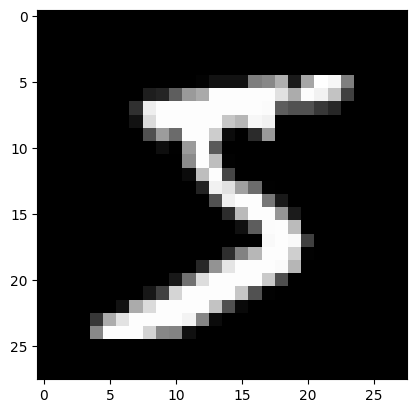

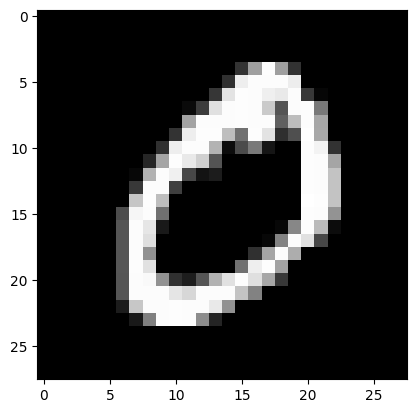

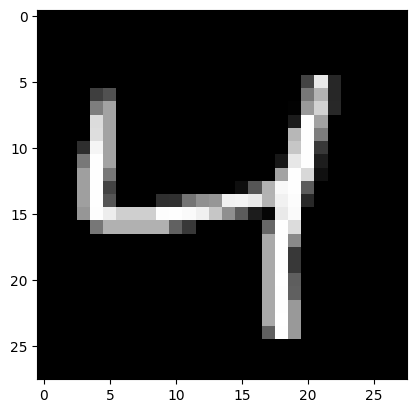

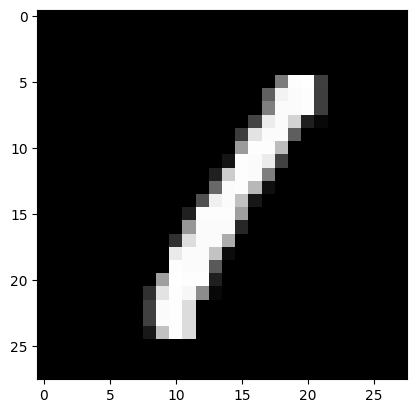

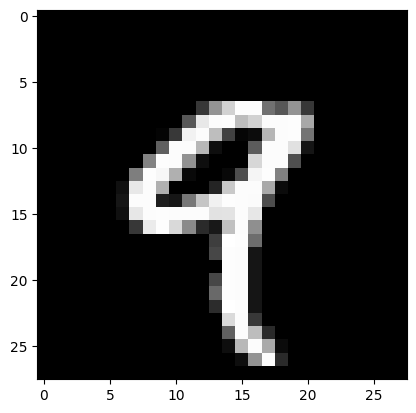

In [148]:
for i in range(5):
    plt.imshow(x[i], cmap="gray")
    plt.show()

### Computing and diagonalizing the covariance of MNIST

We will interpret each image as a vector in $\mathbb{R}^{d}$ with $d = 28^2 = 784$. The dataset can thus be seen as a matrix $in \mathbb{R}^{n \times d}$ where $n = 70000$.

In [149]:
xx = x.reshape((x.shape[0], -1))
xx.shape

(70000, 784)

1) Compute the mean $\mu \in \mathbb R^{d}$ of the MNIST dataset and plot it as a $28 \times 28$ image.

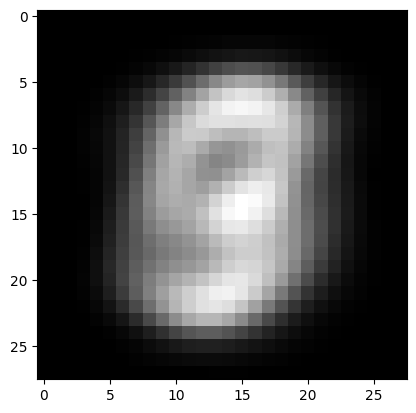

In [150]:
# Your answer here
mean_value = np.mean(xx, axis=0)
reshaped_mean = mean_value.reshape(28, 28)
plt.imshow(reshaped_mean, cmap="gray")
plt.show()

2) Compute the covariance $\Sigma \in \mathbb{R}^{d \times d}$ of the MNIST dataset and diagonalize it using the function `np.linalg.eigh`.

In [151]:
# Your answer here
covariance_matrix = np.cov(xx, rowvar=False)
eigenvalues,eigenvectors=np.linalg.eigh(covariance_matrix)

3) Plot the ordered eigenvalues $\lambda_1 \geq \cdots \geq \lambda_k \geq \cdots$ as a function $k = 1, \dots, d$ with the x axis in log scale, and the first few eigenvectors $u_1, \dots, u_k, \dots$ as $28 \times 28$ images.

In [152]:
# Your answer here
# Sort eigenvalues in descending order and get the indices of the sorted eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
# Reorder the eigenvectors based on the sorted indices
sorted_eigenvectors = eigenvectors[:, sorted_indices]

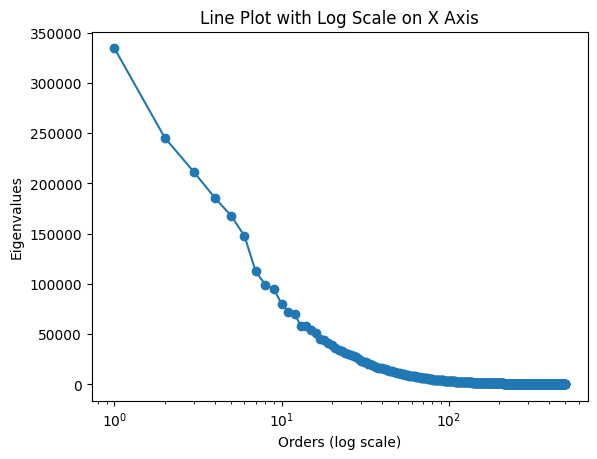

In [153]:
# Visuaalize top k=500 eigenvalues
k=500
length = np.arange(1, k + 1)

# Create a line plot with a log scale on the x-axis
plt.semilogx(length, sorted_eigenvalues[:k], marker='o', linestyle='-')

# Customize the plot labels and title
plt.xlabel('Orders (log scale)')
plt.ylabel('Eigenvalues')
plt.title('Line Plot with Log Scale on X Axis')

# Display the plot
plt.show()

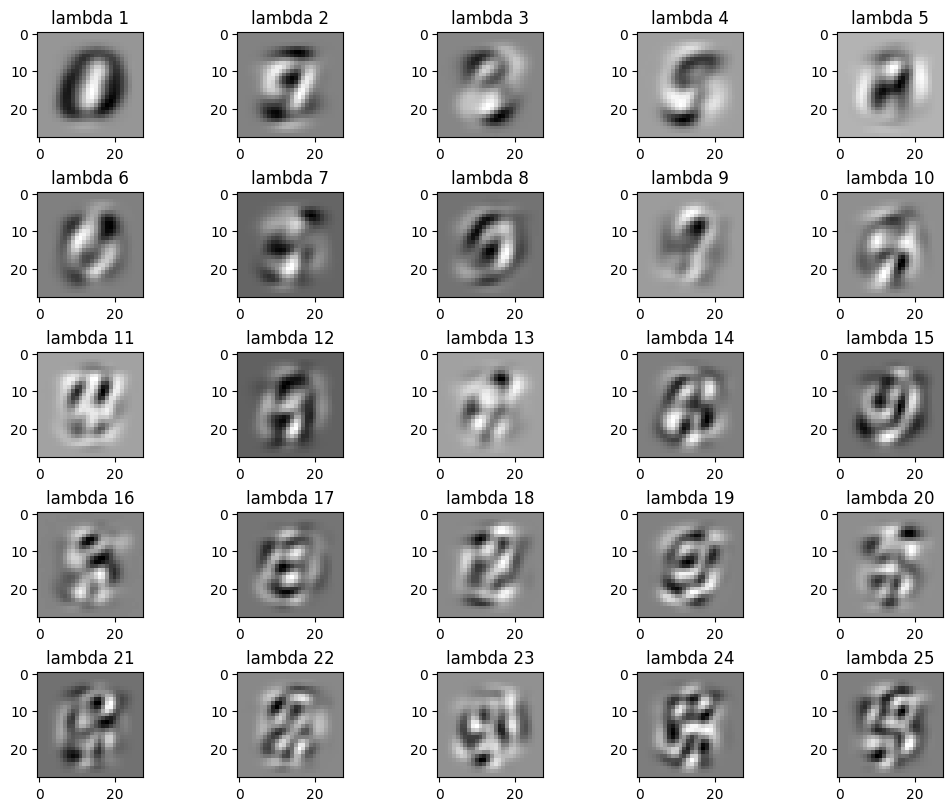

In [154]:
# Image for the top k=25 eigenvectors
fig, axes = plt.subplots(5,5, layout='constrained', figsize=(10, 8))
for i in range(5):
    for j in range(5):
        index = 5 * i + j
        # print('index',index)
        # print(sorted_eigenvectors[:,-index].shape)
        axes[i][j].imshow(sorted_eigenvectors[:,index].reshape(28, 28), cmap="gray")
        axes[i][j].set_title(f"lambda {index + 1}")

### PCA compression of MNIST

4) Let $k \in \mathbb N$. Compute the $k$-dimensional PCA approximation $z_1, \dots, z_n$ of the MNIST dataset using the eigenvectors $u_1, \dots, u_k$. Then, compute the reconstructed images $\hat x_i = \mu + z_{i,1} u_1 + \cdots + z_{i,k} u_k$, which are equal to the mean $\mu$ plus the orthogonal projection of $x_i - \mu$ on $\mathrm{Span}(u_1, \dots, u_k)$. Display the first 5 reconstructed images $\hat x_1, \dots, \hat x_5$. Choose a small value of $k$ that still allows recognizing the digits.

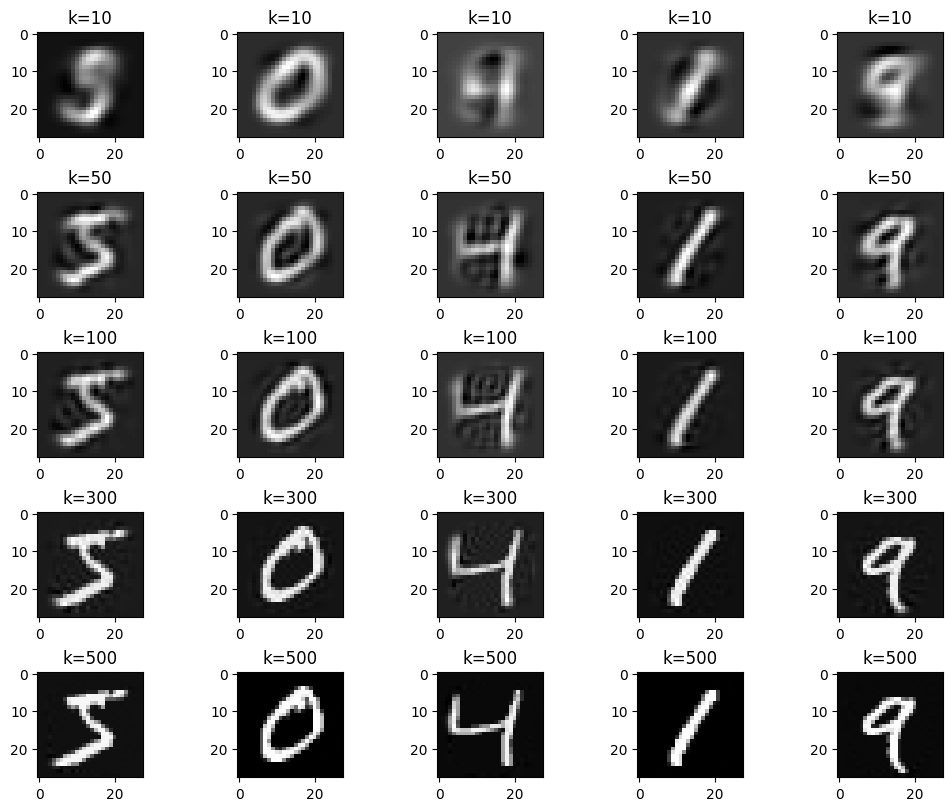

In [155]:
k=[10,50,100,300,500]
fig, axes = plt.subplots(5,5, layout='constrained', figsize=(10, 8))
for i in range(5):
    for j in range(5):
      centered_data = xx[j] - reshaped_mean.reshape(784)
      principal_components = sorted_eigenvectors[:, :k[i]]

# Project Data onto Principal Components
      projected_data = np.dot(centered_data, principal_components)
      reconstructed_data = np.dot(projected_data, principal_components.T) + reshaped_mean.reshape(784)
      reconstructed_data=reconstructed_data.reshape(28,28)

      axes[i][j].imshow(reconstructed_data, cmap="gray")
      axes[i][j].set_title('k='+ str(k[i]))

### I believe k=50 is sufficient for human to recognize the digits